In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [59]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [60]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [61]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [62]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [64]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [65]:
# Get a list of column names and types for measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [66]:
# Get a list of column names and types station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [67]:
# Find the most recent date in the data set.
most_recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()

most_recent_date=most_recent_date[0]

most_recent_date

'2017-08-23'

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date_year_prior


datetime.date(2016, 8, 23)

In [87]:
# Perform a query to retrieve the date and precipitation scores
date_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= date_year_prior).all()
date_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [89]:
# Save the query results as a Pandas DataFrame and set the index to the date column
yearly_prc_df = pd.DataFrame(date_prcp, columns=['date', 'precipitation'])

yearly_prc_df.set_index('date', inplace=True)
yearly_prc_df

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [71]:
# Sort the dataframe by date
sort_by_date_df = yearly_prc_df.sort_values(by=['date'], ascending=True)
sort_by_date_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

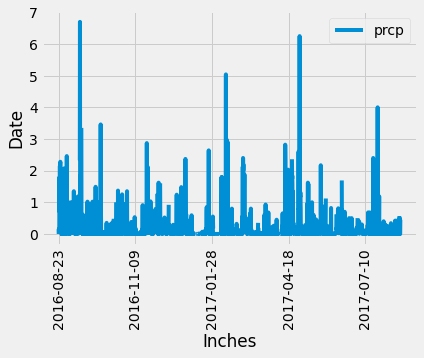

In [91]:
sort_by_date_df.plot()
plt.xticks(rotation = 90) 
plt.xlabel("Inches")
plt.ylabel("Date")

plt.show

In [94]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_by_date_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [97]:
# Design a query to calculate the total number stations in the dataset
station_total=session.query(station).count()
station_total

9

In [75]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station=session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [76]:
# Which station id has the highest number of observations?
most_active_station=session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).limit(1).all()
most_active_station

[('USC00519281', 2772)]

In [77]:
# Print statement: which station id has the highest number of observations?
print(f"Station id 'USC00519281' has the highest number of observations.")

Station id 'USC00519281' has the highest number of observations.


In [78]:
# Using the most active station id from the previous query, calculate the lowest temperature.
most_active_min_temp=session.query(measurement.station, func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
most_active_min_temp

[('USC00519281', 54.0)]

In [79]:
# Using the most active station id from the previous query, calculate the highest temperature.
most_active_max_temp=session.query(measurement.station, func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
most_active_max_temp

[('USC00519281', 85.0)]

In [80]:
# Using the most active station id from the previous query, calculate the average temperature.
most_active_avg_temp=session.query(measurement.station, func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
most_active_avg_temp

[('USC00519281', 71.66378066378067)]

In [99]:
# modified version 
all_results=session.query(measurement.station, func.min(measurement.tobs),\
                          func.max(measurement.tobs),\
                          func.avg(measurement.tobs)).\
                          filter(measurement.station == 'USC00519281').all()
all_results

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [81]:
#Print Statement for most active station id low, high, and avg temperature.
print(f"The Most Active Station ID and Lowest Temperature are = {most_active_min_temp}")
print(f"The Most Active Station ID and Highest Temperature are = {most_active_max_temp}")
print(f"The Most Active Station ID and Average Temperature are = {most_active_avg_temp}")

The Most Active Station ID and Lowest Temperature are = [('USC00519281', 54.0)]
The Most Active Station ID and Highest Temperature are = [('USC00519281', 85.0)]
The Most Active Station ID and Average Temperature are = [('USC00519281', 71.66378066378067)]


In [82]:
# Using the most active station id Query the last 12 months of temperature
# observation data for this station and 
last_years_temps=session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= date_year_prior).\
    order_by(measurement.station).all()

last_years_temps

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

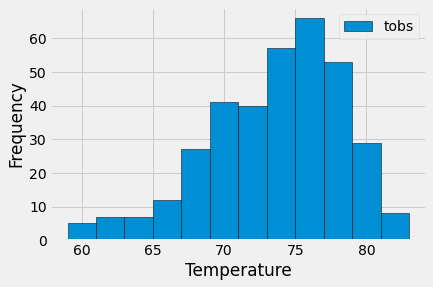

In [101]:
# Plot the results as a histogram
#last_years_temps=pd.DataFrame(last_years_temps, columns=['date', 'tobs'])
last_years_temps.plot.hist(bins=12, edgecolor="black")
plt.xlabel("Temperature")

plt.show()

# Close session

In [84]:
# Close Session
session.close()